In [126]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

#magnetization, here index is tempareture
Mdata = pd.read_csv('C:/Users/mikku/OneDrive/デスクトップ/研究大学院/解析/BrilluinFitting/data/M_Temperature.dat',sep='\t',names=['Mr','MFe'],skiprows=1)
PPdata = pd.read_csv('C:/Users/mikku/OneDrive/デスクトップ/研究大学院/解析/BrilluinFitting/data/pp_experiment',sep='\t',names=['LF_PP','HF_PP'],skiprows=1)
PPcalc = pd.read_csv('C:/Users/mikku/OneDrive/デスクトップ/研究大学院/解析/BrilluinFitting/data/pp_calc',sep=' ',names=['LF_PPcalc','HF_PPcalc'],skiprows=1)
#GHz→Hzに変換
PPdata = PPdata * 10**9
PPcalc = PPcalc * 10**9
#m = abs(Mdata['Mr']) - abs(Mdata['MFe'])
M = abs(Mdata['Mr']) + abs(Mdata['MFe'])
H     = 2000               #external field
gamma = 1.76 * 10**7       #gyromagnetic ratio
PPcalc

,LF_PPcalc,HF_PPcalc
1,8.801532e+11,7.544290e+09
2,8.801532e+11,7.544290e+09
3,8.801500e+11,7.544310e+09
4,8.800972e+11,7.544530e+09
5,8.797978e+11,7.545790e+09
...,...,...
296,3.908196e+11,5.928030e+09
297,3.908156e+11,5.912750e+09
298,3.908021e+11,5.897600e+09
299,3.907823e+11,5.882540e+09


In [127]:
#frequency
def omega_Kriche(T,K,kai):
    H     = 2000               #external field
    gamma = 1.76 * 10**7       #gyromagnetic ratio
    m     = abs(Mdata.loc[T,'Mr']) - abs(Mdata.loc[T,'MFe'])
    M     = abs(Mdata.loc[T,'Mr']) + abs(Mdata.loc[T,'MFe'])
    #kai   = M**2/(lamb*abs(Mdata.loc[T,'Mr'])*abs(Mdata.loc[T,'MFe']))        #suspectibility    3.7 * 10**(-4)
    #print(kai)
    omega_0  = gamma * sqrt(2*K/kai)
    omega_KK = gamma * abs(m) / kai
    omega_H  = gamma * H
    Omega_3  = omega_H - omega_KK/2
    Omega_4  = sqrt(omega_KK**2 - 2*omega_0**2)/2
    return sqrt(Omega_3**2 + Omega_4**2 + sqrt(omega_0**4 + 16*Omega_3**2*Omega_4**2)/2) ,sqrt(Omega_3**2 + Omega_4**2 - sqrt(omega_0**4 + 16*Omega_3**2*Omega_4**2)/2)

def fit_HF(T,K,kai):
    H     = 2000               #external field
    gamma = 1.76 * 10**7       #gyromagnetic ratio
    m     = abs(Mdata.loc[T,'Mr']) - abs(Mdata.loc[T,'MFe'])
    M     = abs(Mdata.loc[T,'Mr']) + abs(Mdata.loc[T,'MFe'])
    omega_0  = gamma * sqrt(2*K/kai)
    omega_KK = gamma * abs(m) / kai
    omega_H  = gamma * H
    Omega_3  = omega_H - omega_KK/2
    Omega_4  = sqrt(omega_KK**2 - 2*omega_0**2)/2
    print('T',T)
    print('omega0*2',2*omega_0)
    print('omegaKK',omega_KK)
    return sqrt(Omega_3**2 + Omega_4**2 + sqrt(omega_0**4 + 16*Omega_3**2*Omega_4**2)/2)

def fit_LF(T,K,kai):
    H     = 2000               #external field
    gamma = 1.76 * 10**7       #gyromagnetic ratio
    m     = abs(Mdata.loc[T,'Mr']) - abs(Mdata.loc[T,'MFe'])
    M     = abs(Mdata.loc[T,'Mr']) + abs(Mdata.loc[T,'MFe'])
    omega_0  = gamma * sqrt(2*K/kai)
    omega_KK = gamma * abs(m) / kai
    omega_H  = gamma * H
    Omega_3  = omega_H - omega_KK/2
    Omega_4  = sqrt(omega_KK**2 - 2*omega_0**2)/2
    return sqrt(Omega_3**2 + Omega_4**2 - sqrt(omega_0**4 + 16*Omega_3**2*Omega_4**2)/2)

#def fit_HF(T,K,lamb):
#    H     = 2000               #external field
#    gamma = 1.76 * 10**7       #gyromagnetic ratio
#    m     = abs(Mdata.loc[T,'Mr']) - abs(Mdata.loc[T,'MFe'])
#    M     = abs(Mdata.loc[T,'Mr']) + abs(Mdata.loc[T,'MFe'])
#    kai   = M**2/(lamb*abs(Mdata.loc[T,'Mr'])*abs(Mdata.loc[T,'MFe']))        #suspectibility    3.7 * 10**(-4)
#    #print(kai)
#    omega_0  = gamma * sqrt(2*K/kai)
#    omega_KK = gamma * abs(m) / kai
#    omega_H  = gamma * H
#    Omega_3  = omega_H - omega_KK/2
#    Omega_4  = sqrt(omega_KK**2 - 2*omega_0**2)/2
#    print('T',T)
#    print('omega0*2',2*omega_0)
#    print('omegaKK',omega_KK)
#    return sqrt(Omega_3**2 + Omega_4**2 + sqrt(omega_0**4 + 16*Omega_3**2*Omega_4**2)/2)
#
#def fit_LF(T,K,lamb):
#    H     = 2000               #external field
#    gamma = 1.76 * 10**7       #gyromagnetic ratio
#    m     = abs(Mdata.loc[T,'Mr']) - abs(Mdata.loc[T,'MFe'])
#    M     = abs(Mdata.loc[T,'Mr']) + abs(Mdata.loc[T,'MFe'])
#    kai   = M**2/(lamb*abs(Mdata.loc[T,'Mr'])*abs(Mdata.loc[T,'MFe']))        #suspectibility    3.7 * 10**(-4)
#    omega_0  = gamma * sqrt(2*K/kai)
#    omega_KK = gamma * abs(m) / kai
#    omega_H  = gamma * H
#    Omega_3  = omega_H - omega_KK/2
#    Omega_4  = sqrt(omega_KK**2 - 2*omega_0**2)/2
#    return sqrt(Omega_3**2 + Omega_4**2 - sqrt(omega_0**4 + 16*Omega_3**2*Omega_4**2)/2)

In [128]:
#curve_fit
x_data = PPdata.index.values
y_data_HF = PPdata['HF_PP']
y_data_LF = PPdata['LF_PP']
lower_bounds = [5000, 0] 
upper_bounds = [14000, 100]
bounds = (lower_bounds, upper_bounds)
param_HF, cov_HF = sp.optimize.curve_fit(fit_HF, x_data, y_data_HF,[8000,0.008],bounds=bounds)
param_LF, cov_LF = sp.optimize.curve_fit(fit_LF, x_data, y_data_LF,[8000,0.008],bounds=bounds)

print('HF',param_HF)
print('LF',param_LF)




T [  6.  20.  30.  35.  40.  43.  45.  48.  50.  53.  55.  60.  65.  70.
  72.  74.  75. 140. 141. 142. 144. 146. 148. 150. 160. 200. 250. 300.]
omega0*2 49780317395.53295
omegaKK 6      4.441475e+11
20     3.917221e+11
30     3.297415e+11
35     2.975849e+11
40     2.657914e+11
43     2.471005e+11
45     2.348501e+11
48     2.168341e+11
50     2.050849e+11
53     1.878811e+11
55     1.767057e+11
60     1.498306e+11
65     1.245105e+11
70     1.007460e+11
72     9.166989e+10
74     8.283367e+10
75     7.850537e+10
140    1.037039e+11
141    1.053755e+11
142    1.070242e+11
144    1.102482e+11
146    1.133792e+11
148    1.164187e+11
150    1.193692e+11
160    1.328798e+11
200    1.703401e+11
250    1.922853e+11
300    1.977718e+11
dtype: float64
T [  6.  20.  30.  35.  40.  43.  45.  48.  50.  53.  55.  60.  65.  70.
  72.  74.  75. 140. 141. 142. 144. 146. 148. 150. 160. 200. 250. 300.]
omega0*2 49780317766.42522
omegaKK 6      4.441475e+11
20     3.917221e+11
30     3.297415e+11
35   

c:\Users\mikku\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\mikku\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\mikku\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\mikku\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\mikku\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufun

In [129]:
# 結果をプロット
#parameters
#K     = 135              #[erg/cm^3]axial anisotropy energy (fitting parameter)
#lamb  = 20000000                   #exchange constant (fitting parameter)
K, lamb = param_HF#10000,0.008  #
print(K, lamb)
HF = [fit_HF(T, K, lamb) for T in Mdata.index.values]
LF = [fit_LF(T, K, lamb) for T in Mdata.index.values]

temp=0
for T in PPdata.index.values:
    #temp = temp + (fit_HF(T, K, lamb) - PPdata.loc[T,'HF_PP'])**2
    temp = temp + (fit_LF(T, K, lamb) - PPdata.loc[T,'LF_PP'])**2
print(f'temp={temp}')


5000.000000000168 0.0049985589831203344
T 1
omega0*2 49787492374.22506
omegaKK 711825774591.3134
T 2
omega0*2 49787492374.22506
omegaKK 711825774591.3134
T 3
omega0*2 49787492374.22506
omegaKK 711823169040.3849
T 4
omega0*2 49787492374.22506
omegaKK 711780036609.4725
T 5
omega0*2 49787492374.22506
omegaKK 711535783814.9926
T 6
omega0*2 49787492374.22506
omegaKK 710840841130.1648
T 7
omega0*2 49787492374.22506
omegaKK 709457469637.8304
T 8
omega0*2 49787492374.22506
omegaKK 707240673949.8295
T 9
omega0*2 49787492374.22506
omegaKK 704135596656.0708
T 10
omega0*2 49787492374.22506
omegaKK 700156638706.9574
T 11
omega0*2 49787492374.22506
omegaKK 695355981541.3553
T 12
omega0*2 49787492374.22506
omegaKK 689805524280.8351
T 13
omega0*2 49787492374.22506
omegaKK 683584947489.6035
T 14
omega0*2 49787492374.22506
omegaKK 676769988195.3282
T 15
omega0*2 49787492374.22506
omegaKK 669431242744.114
T 16
omega0*2 49787492374.22506
omegaKK 661633955539.6184
T 17
omega0*2 49787492374.22506
omegaKK 65

C:\Users\mikku\AppData\Local\Temp\ipykernel_20000\952381180.py:25: RuntimeWarning: invalid value encountered in sqrt
  Omega_4  = sqrt(omega_KK**2 - 2*omega_0**2)/2
C:\Users\mikku\AppData\Local\Temp\ipykernel_20000\952381180.py:41: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(Omega_3**2 + Omega_4**2 - sqrt(omega_0**4 + 16*Omega_3**2*Omega_4**2)/2)
C:\Users\mikku\AppData\Local\Temp\ipykernel_20000\952381180.py:40: RuntimeWarning: invalid value encountered in sqrt
  Omega_4  = sqrt(omega_KK**2 - 2*omega_0**2)/2


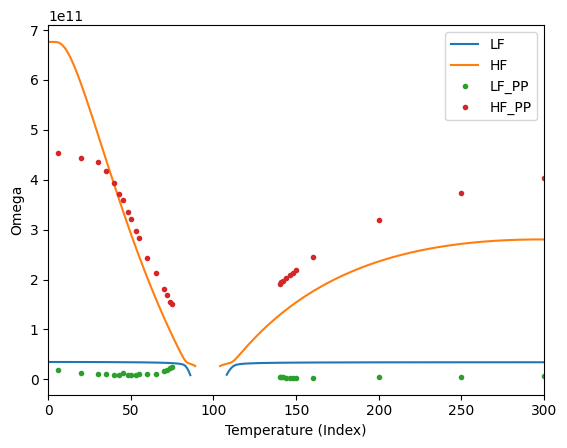

In [130]:
plt.plot(Mdata.index, LF, label='LF')
plt.plot(Mdata.index, HF, label='HF')
plt.plot(PPdata.index.values, PPdata['LF_PP'], label='LF_PP',marker='.',linestyle='None')
plt.plot(PPdata.index.values, PPdata['HF_PP'], label='HF_PP',marker='.',linestyle='None')
#plt.plot(PPcalc.index.values, PPcalc['LF_PPcalc'], label='LF_PPcalc')
#plt.plot(PPcalc.index.values, PPcalc['HF_PPcalc'], label='HF_PPcalc')

plt.xlabel('Temperature (Index)')
plt.ylabel('Omega')
plt.xlim(0,300)
#plt.ylim(0,0.5e11)
plt.legend()
plt.show()